Found 7800 files belonging to 13 classes.
Found 7800 files belonging to 13 classes.
Using 1560 files for validation.


C:\Users\saikarthik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.2553 - loss: 2.1362 - val_accuracy: 0.5141 - val_loss: 1.3285
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 168s 686ms/step - accuracy: 0.4827 - loss: 1.3867 - val_accuracy: 0.6115 - val_loss: 1.0500
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 245s 863ms/step - accuracy: 0.6134 - loss: 1.0552 - val_accuracy: 0.6814 - val_loss: 0.8511
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 196s 804ms/step - accuracy: 0.7124 - loss: 0.8173 - val_accuracy: 0.8353 - val_loss: 0.5211
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 115s 468ms/step - accuracy: 0.8199 - loss: 0.5406 - val_accuracy: 0.8910 - val_loss: 0.3545
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 178s 730ms/step - accuracy: 0.8847 - loss: 0.3696 - val_accuracy: 0.9417 - val_loss: 0.2391
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 169s 689ms/step - accuracy: 0.9252 - loss: 0.2567 - val_accuracy: 0.9538 - val_loss: 0.1583
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 210s 720ms/step - accuracy: 0.9519 - lo

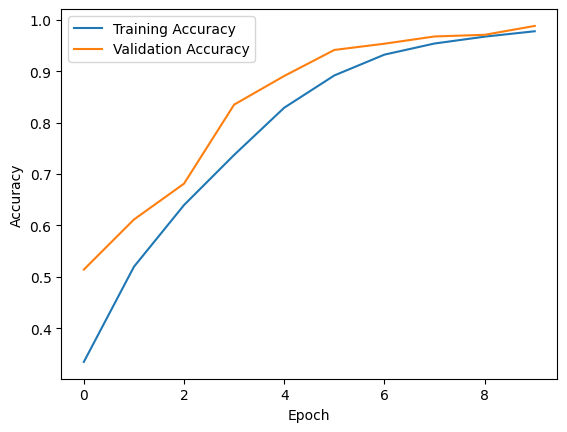

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load images from the Train/ directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    image_size=(128, 128),  # Resize images to a uniform size
    batch_size=32,
    label_mode='int'       # Labels will be integers
)

# Access the class names directly from the raw dataset
class_names = train_dataset.class_names  # This will give you the list of class names

# Split the data into training and validation
val_dataset = tf.keras.utils.image_dataset_from_directory(
    'Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

# Normalize pixel values to [0,1]
normalization_layer = layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Use class_names directly
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
# Save the model to a file
model.save('skinmodel.h5')


In [3]:
# Save the model in the native Keras format
model.save('skinmodel.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Class Index: 1


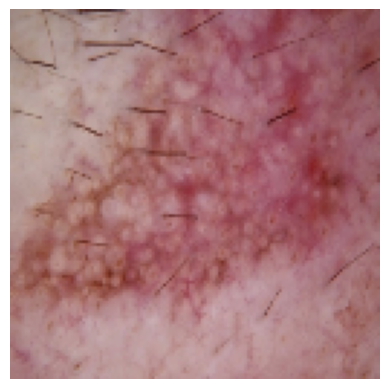

In [6]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model
loaded_model = load_model('skinmodel.h5')

# Recompile the model (to ensure metrics are set up correctly, optional but resolves the warning)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess a single image
def preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))  # Resize the image
    image = tf.keras.preprocessing.image.img_to_array(image)  # Convert to numpy array
    image = image / 255.0  # Normalize
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Specify the image path for testing
image_path = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780_aug_0_aug_1_aug_1.jpg'
image = preprocess_image(image_path)

# Predict with the loaded model
prediction = loaded_model.predict(image)

# Get the class index
predicted_class_index = prediction.argmax()  # Index of highest probability class
print("Predicted Class Index:", predicted_class_index)

# Display the image
plt.imshow(tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128)))
plt.axis('off')
plt.show()


In [1]:
import tensorflow as tf

# Load the saved Keras model
model = tf.keras.models.load_model('skinmodel.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted .tflite model to a file
with open('skinmodel.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite!")


INFO:tensorflow:Assets written to: C:\Users\SAIKAR~1\AppData\Local\Temp\tmp43c9_kh3\assets


INFO:tensorflow:Assets written to: C:\Users\SAIKAR~1\AppData\Local\Temp\tmp43c9_kh3\assets


Saved artifact at 'C:\Users\SAIKAR~1\AppData\Local\Temp\tmp43c9_kh3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 13), dtype=tf.float32, name=None)
Captures:
  2776082018576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776082018768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776082019920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776082020496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776082021840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776082022032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776083235664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2776083236816: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully converted to TensorFlow Lite!


In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='skinmodel.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [2]:
def preprocess_image_tflite(image_path):
    # Load and resize the image
    image = Image.open(image_path).resize((128, 128))
    image = np.array(image).astype('float32')  # Convert to numpy array and float32
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


In [4]:
# Preprocess the image
image_path = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/Acne/07Acne081101.jpg'
input_image = preprocess_image_tflite(image_path)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_image)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Get the predicted class index
predicted_class_index = np.argmax(output_data)
print("Predicted Class Index:", predicted_class_index)


Predicted Class Index: 0
